# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
city_final = []
lat = []
lng = []
max_temp = []
hum = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
count = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

for city in cities:
    record += 1
    print(f"Processing Record {record} of Set {count} | {city}")
    #print(query_url + city)
    response = requests.get(query_url + city)
    #print(response.status_code)
    if response.status_code == 200:
        response = response.json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_final.append(city)
    else: 
        print(f"City not found. Skipping...")
    if record > 49:
        record = 0
        count += 1
        time.sleep(60)
    
        


Processing Record 1 of Set 1 | rawson
Processing Record 2 of Set 1 | wukari
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | mariveles
Processing Record 6 of Set 1 | laje
Processing Record 7 of Set 1 | thinadhoo
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | wattegama
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | itoman
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | marawi
Processing Record 17 of Set 1 | tapes
Processing Record 18 of Set 1 | novobelokatay
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | narsa

Processing Record 44 of Set 4 | nichinan
Processing Record 45 of Set 4 | layou
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | doka
Processing Record 48 of Set 4 | maniitsoq
Processing Record 49 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 4 | gadwal
Processing Record 1 of Set 5 | tallahassee
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | asyut
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | ponta delgada
Processing Record 6 of Set 5 | mana
Processing Record 7 of Set 5 | komsomolskiy
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 10 of Set 5 | lavrentiya
Processing Record 11 of Set 5 | bonavista
Processing Record 12 of Set 5 | goderich
Processing Record 13 of Set 5 | polazna
Processing Record 14 of Set 5 | ati
Processing Record 15 of Set 5 | regina
Processing Record 16 of

Processing Record 30 of Set 8 | tautira
Processing Record 31 of Set 8 | raga
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | storsteinnes
Processing Record 34 of Set 8 | wadi maliz
Processing Record 35 of Set 8 | turayf
Processing Record 36 of Set 8 | san rafael
Processing Record 37 of Set 8 | ixtapa
Processing Record 38 of Set 8 | obo
Processing Record 39 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 40 of Set 8 | new norfolk
Processing Record 41 of Set 8 | adrar
Processing Record 42 of Set 8 | oranjemund
Processing Record 43 of Set 8 | port hedland
Processing Record 44 of Set 8 | progreso
Processing Record 45 of Set 8 | nara
Processing Record 46 of Set 8 | tevaitoa
Processing Record 47 of Set 8 | yar-sale
Processing Record 48 of Set 8 | robertsport
Processing Record 49 of Set 8 | dongsheng
Processing Record 50 of Set 8 | kilemary
Processing Record 1 of Set 9 | kondinskoye
Processing Record 2 of Set 9 | ksenyevka
City not found. Skipping

Processing Record 18 of Set 12 | biscarrosse
Processing Record 19 of Set 12 | cusuna
Processing Record 20 of Set 12 | shache
Processing Record 21 of Set 12 | joao camara
Processing Record 22 of Set 12 | erdaojiang
Processing Record 23 of Set 12 | khonuu
City not found. Skipping...
Processing Record 24 of Set 12 | alexandria
Processing Record 25 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 26 of Set 12 | madawaska
Processing Record 27 of Set 12 | wunsiedel
Processing Record 28 of Set 12 | bandrele
Processing Record 29 of Set 12 | naples
Processing Record 30 of Set 12 | ust-nera
Processing Record 31 of Set 12 | yanan
City not found. Skipping...
Processing Record 32 of Set 12 | fremont
Processing Record 33 of Set 12 | tessalit
Processing Record 34 of Set 12 | ypsonas
Processing Record 35 of Set 12 | tubuala
Processing Record 36 of Set 12 | nouadhibou
Processing Record 37 of Set 12 | hobyo
Processing Record 38 of Set 12 | yerbogachen
Processing Record 39 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": city_final,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
weather_data.to_csv('Outputs/weather_data.csv')

In [5]:
humidity_count = []
humidity_count = weather_data[weather_data["Humidity"] > 100]  

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_count.shape[0]

0

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data = weather_data[weather_data["Humidity"] <= 100]  
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rawson,-43.3002,-65.1023,63.79,49,0,18.57,AR,1644204026
1,wukari,7.8500,9.7833,69.15,22,0,4.72,NG,1644204027
2,qaanaaq,77.4840,-69.3632,-11.67,59,29,7.25,GL,1644204027
3,cape town,-33.9258,18.4232,65.26,86,75,1.01,ZA,1644203943
4,mariveles,14.4833,120.4833,79.59,74,99,16.22,PH,1644204027


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

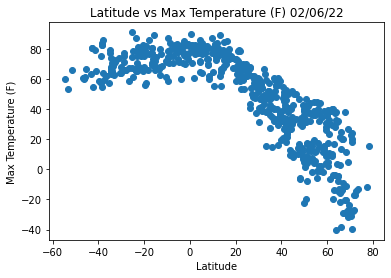

In [8]:
plt.scatter(lat, max_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature (F) 02/06/22");
plt.savefig('Outputs/Fig1.png')

## Latitude vs. Humidity Plot

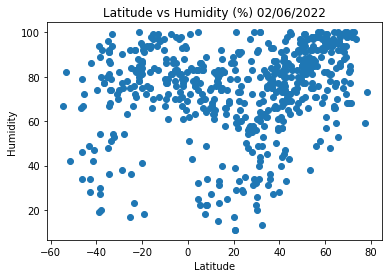

In [9]:
plt.scatter(lat, hum)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (%) 02/06/2022");
plt.savefig('Outputs/Fig2.png')

## Latitude vs. Cloudiness Plot

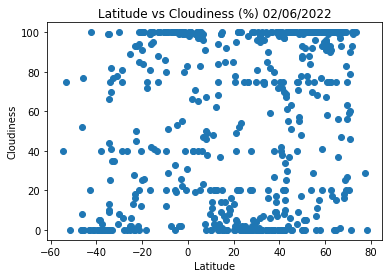

In [10]:
plt.scatter(lat, cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (%) 02/06/2022");
plt.savefig('Outputs/Fig3.png')

## Latitude vs. Wind Speed Plot

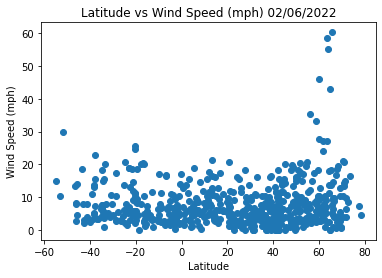

In [11]:
plt.scatter(lat, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (mph) 02/06/2022");
plt.savefig('Outputs/Fig4.png')

## Linear Regression

In [12]:
nh_df = weather_data.loc[weather_data["Lat"] >= 0]
sh_df = weather_data.loc[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7518819604521982


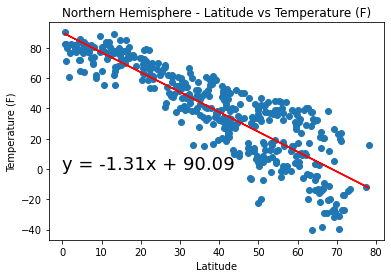

In [39]:
# Calculate and display results
x_values = nh_df["Lat"]
y_values = nh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(0,0),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs Temperature (F)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig5.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22128613357624236


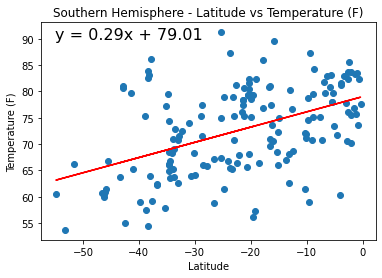

In [40]:
x_values = sh_df["Lat"]
y_values = sh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-55,90),fontsize=16)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs Temperature (F)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18001424712063


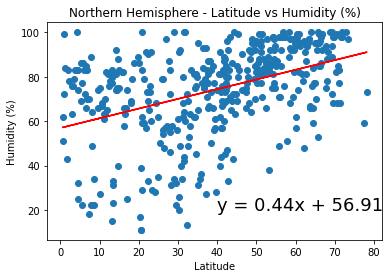

In [41]:
x_values = nh_df["Lat"]
y_values = nh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(40,20),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs Humidity (%)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14132528762411775


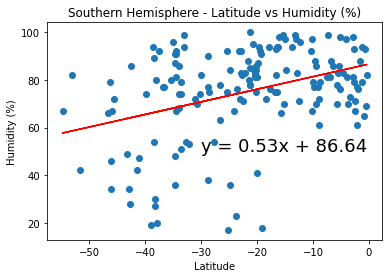

In [42]:
x_values = sh_df["Lat"]
y_values = sh_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-30,50),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Latitude vs Humidity (%)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06614795178363089


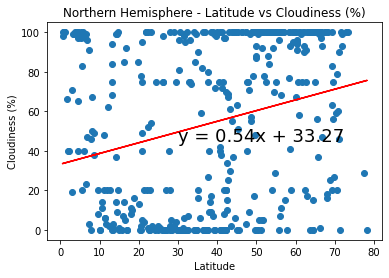

In [43]:
x_values = nh_df["Lat"]
y_values = nh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(30,45),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18738491144433334


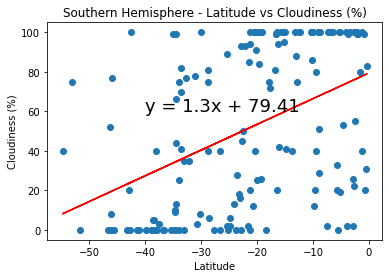

In [44]:
x_values = sh_df["Lat"]
y_values = sh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-40,60),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03492626451952982


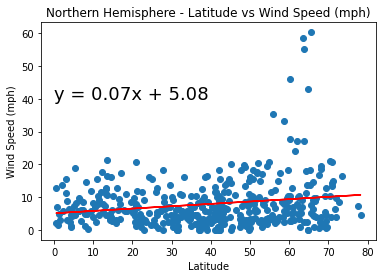

In [45]:
x_values = nh_df["Lat"]
y_values = nh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(0,40),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03134738727252093


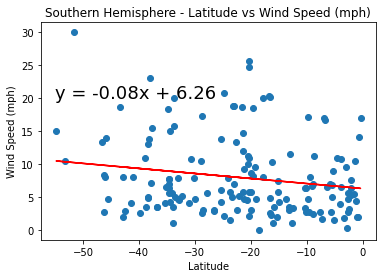

In [47]:
x_values = sh_df["Lat"]
y_values = sh_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.annotate(line_eq,(-55,20),fontsize=18)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}");
plt.savefig('Outputs/Fig12.png')